# Assignment 2
Lauri Pessi | bft860

## Dataset: employee.csv

In [18]:
# Setup
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, math
from scipy.stats import chi2_contingency

# Import file as dataframe
df = pd.read_csv('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/employee.csv')

n = int(df.shape[0])
print('Rows: ' + str(n))
print('Cols: ' + str(df.shape[1]))

df.head()

Rows: 1470
Cols: 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Gender effect on distribution in monthy income

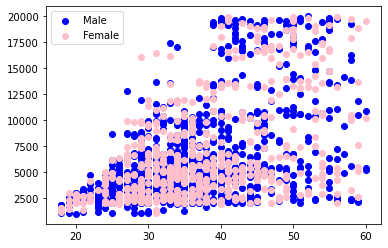

In [25]:
# Let's see if there's a visible difference in Age to Income ratio between men and women
plt.scatter(x=df[df.Gender=='Male'].Age, y=df[df.Gender=='Male'].MonthlyIncome, c='Blue', label='Male')
plt.scatter(x=df[df.Gender=='Female'].Age, y=df[df.Gender=='Female'].MonthlyIncome, c='Pink', label='Female')
plt.legend()

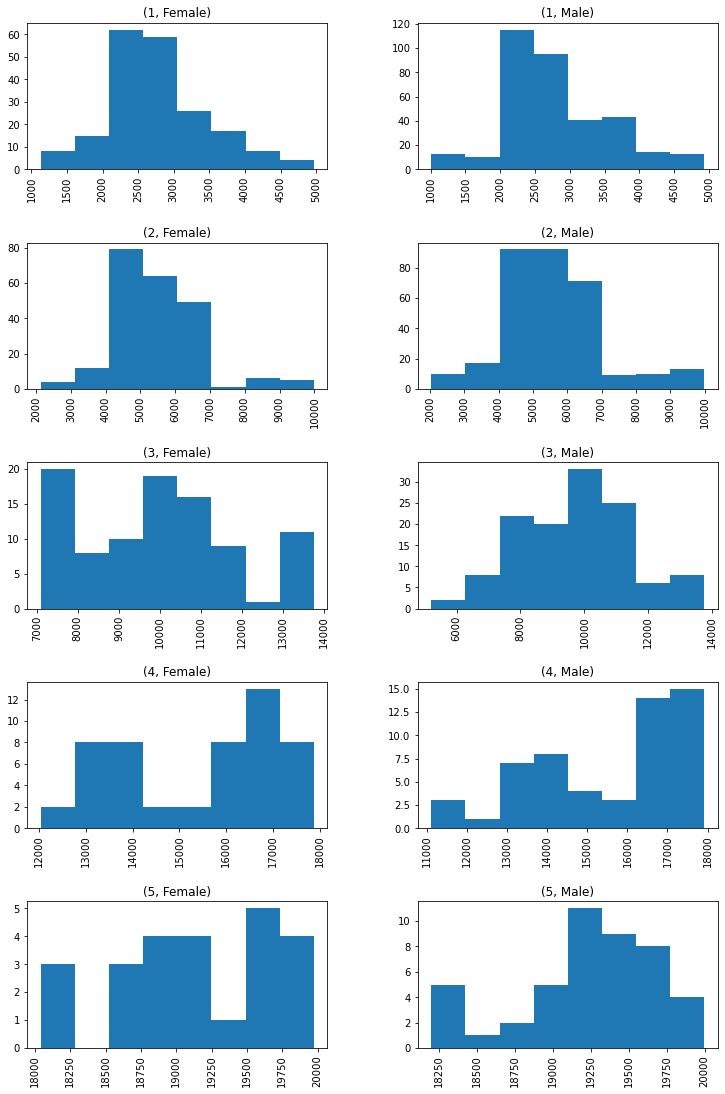

In [26]:
# Also see if the distribution of incomes differs by gender within similar role
ax = df.hist(column='MonthlyIncome', by=['JobLevel', 'Gender'], bins=8, figsize=[12,80], layout=[20,2])

In [64]:
# Can't really say much on the distributions by these plots, let's look at the numerics instead
df1 = pd.crosstab(df['JobLevel'], df['Gender'], normalize='columns').sort_values(by='JobLevel')
df1.style.format('{:.0%}')

Gender,Female,Male
JobLevel,,
1,34%,39%
2,37%,36%
3,16%,14%
4,9%,6%
5,4%,5%


<AxesSubplot:ylabel='Gender'>

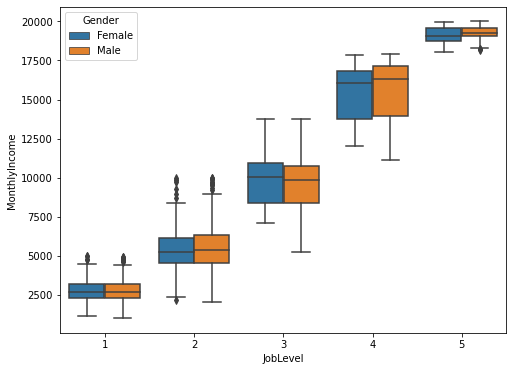

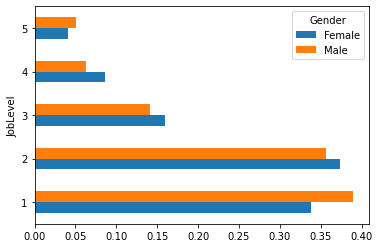

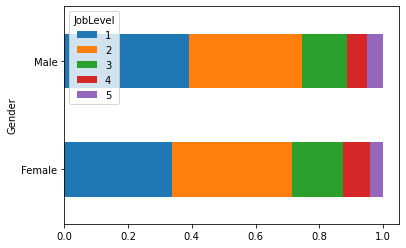

In [106]:
# Another look into the same with few different plottings
fig = plt.figure(figsize=(8, 6))
sns.boxplot(x=df.JobLevel, y=df.MonthlyIncome, hue=df.Gender)
df1.plot.barh()
df1.T.plot.barh(stacked = True)

Ok, so there might be some glass ceiling for women to get into the highest positions, albeit based on these images the effect doesn't seem significant.
Let's check if the assumption holds with chi-squared test.

In [125]:
print('The P-value from chi-squared test is:')
chi2_contingency(pd.crosstab(df['JobLevel'], df['Gender']))[1]

The P-value from chi-squared test is:


0.11461093308997214

### Coclusions
- Monthly income is slightly more skewed on the higher end of spectrum with men compared to female
    - This can also be observed from slightly higher medians in incomes of top 2 jobLevels
- However, gender doesn't have a significant effect on employees position (JobLevel)
    - This was confirmed by a > 5 % P-value from chi-test (~ 11%) 

## Correlation between variables

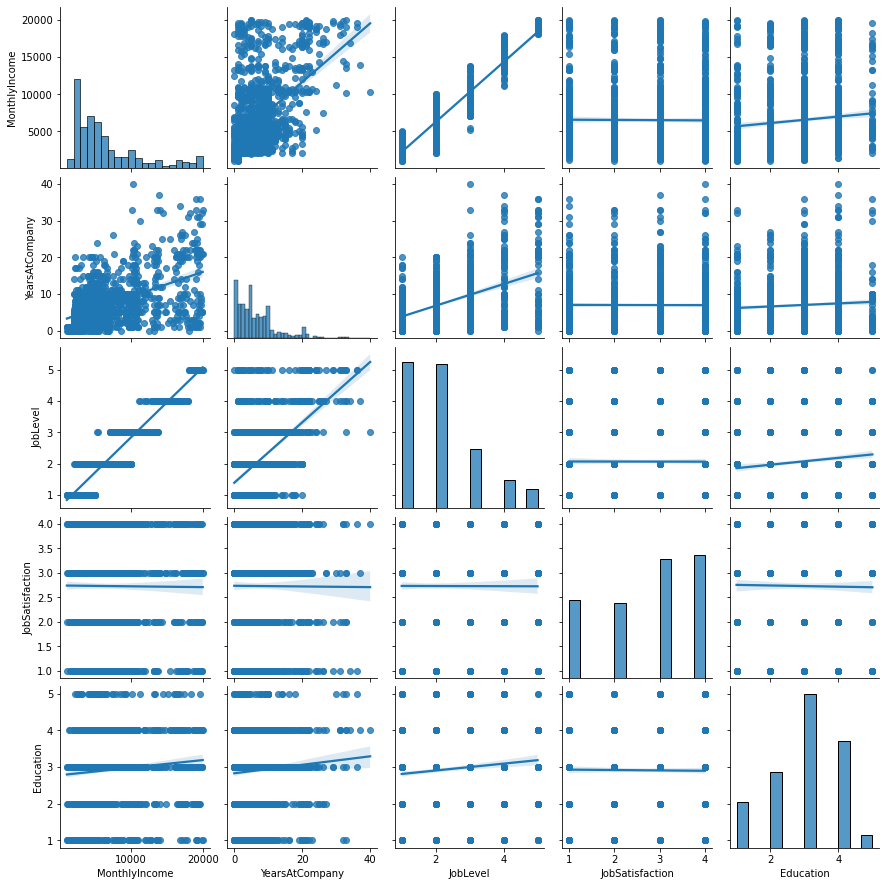

In [121]:
# Lets see also possible correlations between different variables
sns.pairplot(df[['MonthlyIncome','YearsAtCompany','JobLevel','JobSatisfaction','Education']], kind ='reg')

## Conclusions
Now here's a lot of info - many of it quite obvious, and some slightly suprising
- The longer experience one has, the more likely also the position is higher
- With higher positions come higher wages
- Education doesn't look to have major effect on joblevel nor salary
- JobSatisfaction doesn't much differ regardless of position or wage